# Wildfire Severity Estimates to Support Property Insurance Metrics 

### Wildfires account for a significant portion of total property losses and consequently highly impact the buisness insurance industry.

Total wildfire suppression costs have averaged approximately [$2.6 billion over the past 5 years](https://www.nifc.gov/fire-information/statistics/suppression-costs) according to the National Interagency Fire Center. Verisk Analytics, a data analytics company that assesses insurance risk, identified more than [4.5 million U.S. homes](https://www.forbes.com/advisor/homeowners-insurance/wildfires/) as being at high or extreme risk of wildfire and on average more than [2,500 homes in the U.S.](https://www.forbes.com/advisor/homeowners-insurance/wildfires/) are destroyed every year due to wildfires. As a result, insurers face huge losses and many have pulled back from fire prone areas. This negatively impacts the insurance companies, as well as the local communities. 

With high severity and low frequency, fire losses are inherently volatile, which makes modeling and predicting their impacts extremely difficult. Wildfires will only get worse due to warmer, drier environmental conditions, increases in drought severity, and longer fire seasons resulting from future climate change. 

### This project built Machine Learning Algorithms to predict wildfire severity using NASA spatial products and a large historical wildfire database.

My objective was to quantify and predict wildfire severity in the western U.S. based on relevant historical and spatial datasets. The spatial trends and drivers of wildfire severity can be used as a metric for homeowners and insurance agencies when negotiating insurance policies.   

I downloaded NASA spatial datasets of soil and vegetation and collected historical records of fire location, total burned acres, and other noted damage resulting from a fire from an online database. The data was used with machine learning models to rate areas as having a low to high risk of wildfire severity. Additional features can be added to these models to improve future wildfire severity predictions and aid insurers with policy assessement.

## How is wildfire severity quantified?

There are several factors to consider when describing and quantifying wildfire severity.

__Acres burned__: The total number of acres burned by a fire. __Fire Class__ is a common metric for grouping wildfires into categories based on acres burned.

| Fire Class | Description |
| --- | --- |
| Class A | < 0.25 acres |
| Class B | 0.25 acre - 10 acres |
| Class C | 10 - 100 acres |
| Class D | 100 - 300 acres |
| Class E | 300 - 1,000 acres |
| Class F | 1,000 - 5,000 acres |
| Class G | > 5,000 acres |

__Wildfire occurrence__: This is the number of recorded fires in a defined area.

__Fire intensity__: This reflects the amount of energy released per unit length of the flame front. It is often, but not always, related to fire severity.

__Fire severity__: This is the amount of vegetation destroyed or other ecological and infrastructure damage incurred from a wildfire. Overall, drier, warmer and windier conditions lead to greater fire severity in terms of vegetation destruction and also increase the probability of loss of lives and damage to properties. An area's susceptibility to fire severity is often extremely difficult to quantify. 


# Description of Datasets and Model Features

I used two datasets in this analysis: 1) U.S. Historical Wildfire Dataset and 2) NASA soil and vegetation geospatial data.

### 1. U.S. Historical Wildfire Dataset

This SQL [dataset](https://www.kaggle.com/rtatman/188-million-us-wildfires) includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned from 1992 to 2015 in the United States. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations and the data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG). Basic error-checking was performed and redundant records were identified and removed.

__Let's do some data exploration!__

In [1]:
# Load required modules and historical dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('WildFires.csv', index_col=None, low_memory=False)

# Specify the first and last year of interest. This can be updated to any date range between 1992-2015.
start_yr = 1992
end_yr = 2015

#### Calculate the Total Reported Fires per Year in the United States

Total Reported Fires:
 r2 = 0.052
 p-value = 0.297


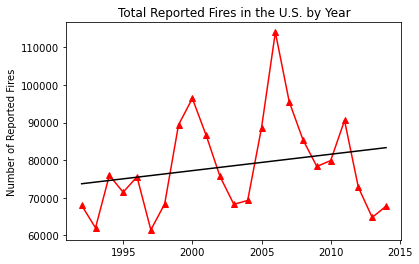

In [2]:
import data_visualizations

data_visualizations.fig_fire_yr(df, start_yr, end_yr)

#### Calculate The Total Number of Fires for Each State in the United States

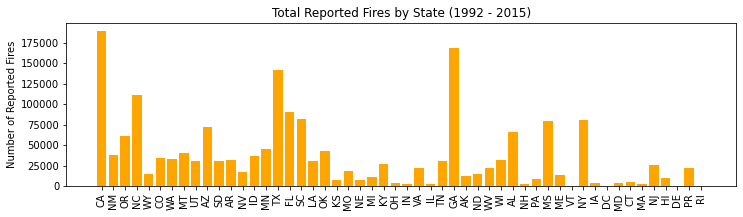

In [3]:
data_visualizations.fig_fire_by_state(df, start_yr, end_yr)

#### Calculate Average and Maximum Number of Acres within the Final Perimeter of a Fire

Average Number of Acres:
 r2 = 0.268
 p-value = 0.011
Maximum Number of Acres:
 r2 = 0.216
 p-value = 0.025


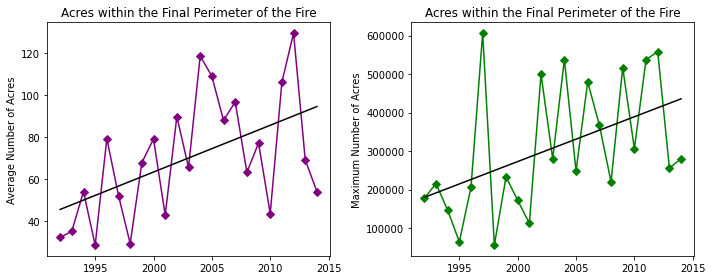

In [4]:
data_visualizations.fig_acres_final(df, start_yr, end_yr)

#### Number of Fires in Each Size Class by State (refer to the Fire Class Table above)

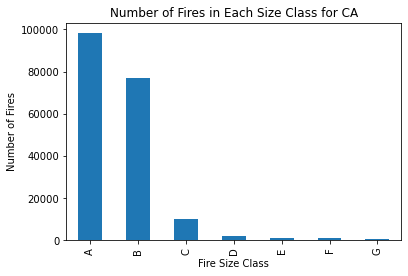

In [5]:
# What state are you interested in? Update 'CA' to a state of your choice.
state = 'CA'

data_visualizations.fig_fire_class(df, start_yr, end_yr, state)

### 2. NASA Soil and Vegetation Spatial Datasets (NetCDF)

The [soils](https://ldas.gsfc.nasa.gov/nldas/soils) and [vegetation](https://ldas.gsfc.nasa.gov/nldas/vegetation-class) spatial data are publicly available NASA data products used for the [North American Land Data Assimilation System (NLDAS)](https://ldas.gsfc.nasa.gov/nldas) across the contiguous United States. The soils dataset was derived from 1-km Penn State [STATSGO](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/geo/?cid=nrcs142p2_053629) data and there are 16 classifications of soil texture or types. The land cover and vegetation classification map was generated using imagery from [AVHRR satellites](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-advanced-very-high-resolution-radiometer-avhrr?qt-science_center_objects=0#qt-science_center_objects) between 1981 and 1994. There are 14 vegetation and land cover class at a 1-km resolution.

| Soil Index | Soil Texture Class | Vegetation Index | Vegetation Class |
| --- | --- | ---| --- |
| | | 0 | Water |
| 1 | SAND | 1 | Evergreen Needleleaf Forest |
| 2 | LOAMY SAND | 2 | Evergreen Broadleaf Forest |
| 3 | SANDY LOAM | 3 | Deciduous Needleleaf Forest |
| 4 | SILT LOAM | 4 | Deciduous Broadleaf Forest |
| 5 | SILT | 5 | Mixed Cover |
| 6 | LOAM | 6 | Woodland |
| 7 | SANDY CLAY LOAM | 7 | Wooded Grassland |
| 8 | SILTY CLAY LOAM | 8 | Closed Shrubland |
| 9 | CLAY LOAM | 9 | Open Shrubland |
| 10 | SANDY CLAY | 10 | Grassland |
| 11 | SILTY CLAY | 11 | Cropland |
| 12 | CLAY | 12 | Bare Ground |
| 13 | ORGANIC MATERIAL | 13 | Urban and Built-Up |
| 14 | WATER |
| 15 | BEDROCK |
| 16 | OTHER(land-ice) |

__Let's do some data exploration!__


#### Visualize Geospatial Soils and Vegetation Data for Each Reported Fire

I classified the soil texture and vegetation for each reported fire location in the historical dataset. This was done for the Western U.S. states of California (CA), Oregon (OR), Washington (WA) and Nevada (NV). The figure legends relate to the classifications in the table above.

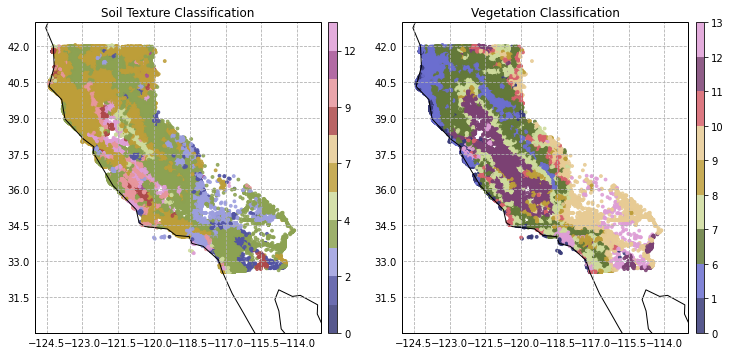

In [6]:
# Specify the state (CA, OR, WA, NV) you wish to visualize.
state = 'CA'
data_visualizations.fig_soil_veg_map(state)

# Wildfire Severity Predictions

Machine learning (ML) models were built using python's [scikit-learn](https://scikit-learn.org/stable/) library. The analysis was implemented by state and for each state, 20% of the data was held for testing. First, I removed null values from the histroical dataset and encoded each of its categorical features. Next, I standardized many of the numeric features by subtracting the mean and dividing by the standard deviation so the mean = 0 and standard deviation = 1. The algorithm estimates the total number of acres burned for a specific location. This value was then translated into one the fire classes descibed in the table above.

Number of training examples: 151640
Number of testing examples: 37910

 Fire Class Records from and Predictions on the test dataset:


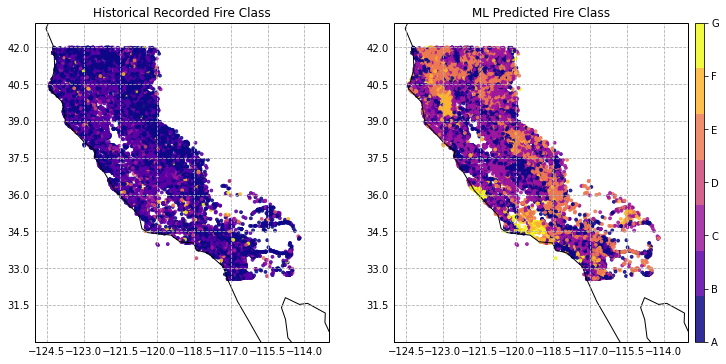

In [7]:
import ML_wildfire_severity

# Specify the state (CA, OR, WA, NV) you are interested in.
state = 'CA'

ML_wildfire_severity.make_predictions(state)

# Applications for Insurers

Additional features can be added to these models to improve future wildfire severity predictions and aid insurers with policy assessement.

The associated python scripts are intended to be easily adaptable and can be revised to fit a different region of interest. New features or additional datasets can be brought into this analysis to improve upon these fire severity predictions. Additional metrics, such as fire intensity, could be predicted by adapting this model framework. 